## Excitatory vs Inhibitory
 #### Questions:
  - Are there any event types that has significantly less excitadory or inhibited neurons?
  - If there clearly exists a type of event that has more excited or inhibited could we possibly group them by any types of features?
  - Out of these neurons what percent of these are pyr vs inter?
  - Are there any neurons that are way more excited or inhibited?
  - Are there any neurons that do or do not overlap across different events in the recordings.

#### Plot/Results Ideas:
 - Pie plot of percentage of excited vs inhibited during an event | Bar Plot as well to show all the events
 - If there's a clear pattern in an event type, make swarm plots of the neurons, y-axis z-score, x-axis events, show's groupings of inhibited and excited
 - More plot for putative types included tbd
 - Overlap Plots


#### Method:
 - To answer if there are event types that have much less excited vs inhibited, count number of excited vs inhibited per event type.

#### DataFrame Definitions:
 - Recording – Recording Filename, identifier for the recording session
 - Event name – Label of the behavioral or experimental event
 - Unit number – Unique number identifying a neuron/unit.
 - Event Z-Score – Standardized response of the unit during the event window relative to baseline.
  - Positive Z = excitatory (above baseline)
  - Negative Z = inhibitory (below baseline)
 - sig – tells you whether a neuron was significant during those events ('increase', 'decrease', 'not sig')
 - Event windows – The number of events it was
 - putative type – Cell type classification (e.g., pyramidal vs interneuron).

In [1]:
import spike.spike_analysis.spike_collection as sc
import spike.spike_analysis.spike_recording as sr
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.normalization as norm
import spike.spike_analysis.single_cell as single_cell
import spike.spike_analysis.spike_collection as collection
import spike.spike_analysis.zscoring as zscoring
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import os
import behavior.boris_extraction as boris
import matplotlib.pyplot as plt
import pickle
import re
import ast

In [2]:
pd.set_option('display.max_colwidth', 0)  # 0 means unlimited in newer pandas versions

# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Don’t truncate column contents
pd.set_option("display.max_colwidth", None)

# Expand the display to the full width of the screen
pd.set_option("display.width", 0)


In [3]:
EVENTS = [
    'alone_rewarded', 'alone_rewarded_baseline', 'high_comp', 'high_comp_lose',
    'high_comp_lose_baseline', 'high_comp_win', 'high_comp_win_baseline',
    'lose', 'low_comp', 'low_comp_lose', 'low_comp_lose_baseline',
    'low_comp_win', 'low_comp_win_baseline', 'overall_pretone', 'win'
]

In [33]:
df_path = r"C:\Users\thoma\Code\ResearchCode\diff_fam_social_memory_ephys\other_peoples_sutff\Thomas\reward_comp\outputs\zscores_event_specific.csv"

In [34]:
# 1) Read
units_df = pd.read_csv(df_path)
units_df.head(30)

,Recording,Event name,Unit number,Pre-event M,Pre-event SD,Event M,Event Z-Score,sig,Event windows
0,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,104,0.075,0.331082,0.075,0.000000,not sig,40
1,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,11,0.250,0.872178,0.270,0.022931,not sig,40
2,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,122,0.060,0.264866,0.185,0.471937,not sig,40
3,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,125,0.745,1.910398,0.690,-0.028790,not sig,40
4,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,126,4.010,5.684758,3.215,-0.139848,not sig,40
5,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,130,0.055,0.212739,0.105,0.235030,not sig,40
6,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,143,0.850,2.004350,0.970,0.059870,not sig,40
7,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,147,0.030,0.132433,0.060,0.226530,not sig,40
8,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,158,0.190,0.703983,0.570,0.539786,not sig,40
9,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,189,1.855,3.247928,1.815,-0.012316,not sig,40


##### Filtering for only Significant Units and Dropping Unecesary Columns Global Pre-event M | Global Pre-event SD | Event M

In [36]:
units_df = units_df[units_df['sig'] != 'not sig']
units_df = units_df.drop(["Pre-event M", "Pre-event SD", "Event M"], axis=1)

In [37]:
units_df.head(10)

,Recording,Event name,Unit number,Event Z-Score,sig,Event windows
336,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,52,7.324596,increase,40
339,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,68,10.870873,increase,40
419,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,low_comp,68,17.789169,increase,11
448,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,low_comp_win,61,1.741859,increase,6
478,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,win,61,1.775428,increase,7
566,20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged.rec,high_comp_win,86,8.500000,increase,4
620,20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged.rec,low_comp_lose,53,1.732051,increase,3
1076,20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged.rec,low_comp,513,3.410700,increase,9
1106,20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged.rec,low_comp_win,513,2.991410,increase,8
1115,20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged.rec,win,351,2.064742,increase,19


In [38]:
len(units_df['Unit number'])

95

In [39]:
len(units_df['Unit number'].unique())

46

### Swarm Plot of each Event Types Neurons and their Z-Scores

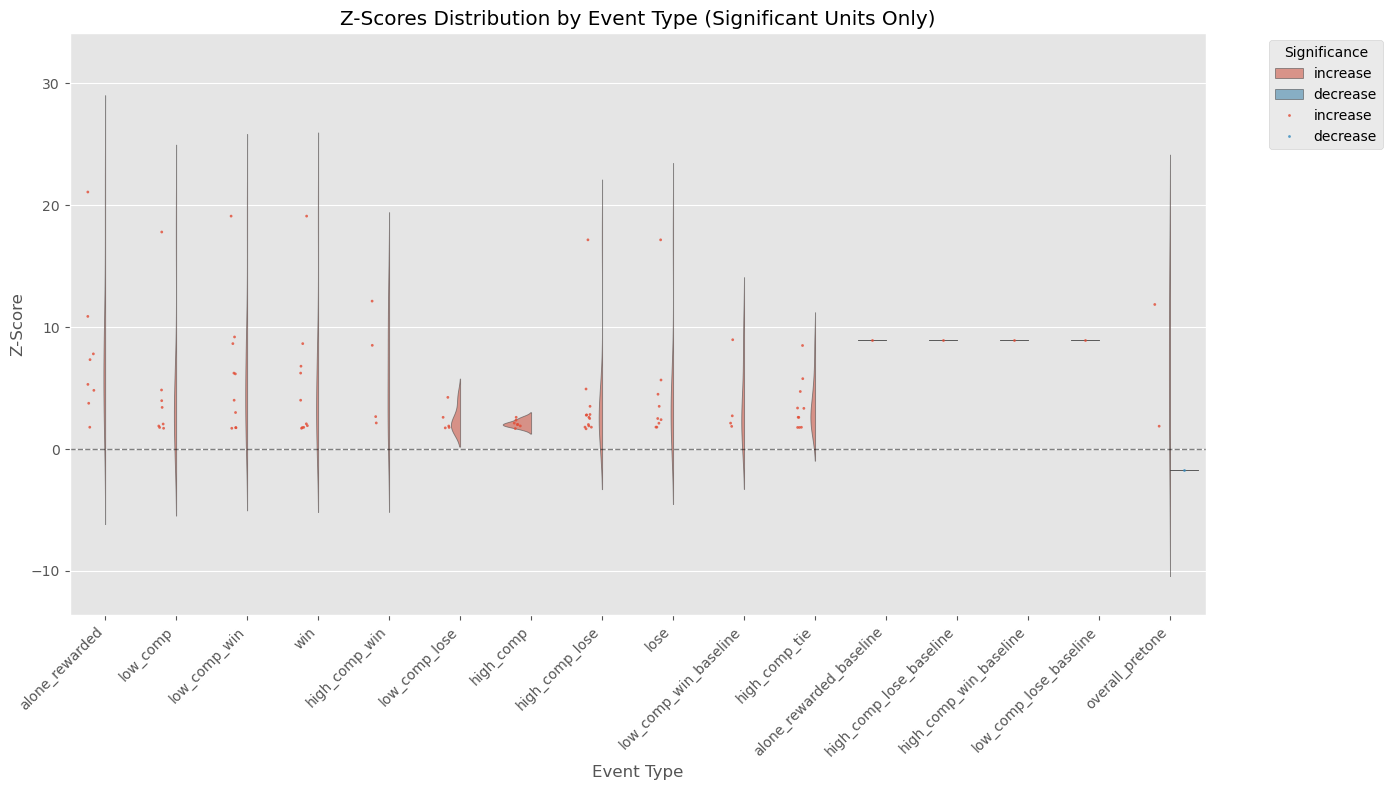

In [40]:
swarm_df = units_df.copy()

# Create swarm plot
import seaborn as sns
plt.figure(figsize=(14, 8))
# Create violin plot with strip plot overlay for better visualization of dense data
sns.violinplot(data=swarm_df, x='Event name', y='Event Z-Score', hue='sig', split=True, inner=None, alpha=0.6)
sns.stripplot(data=swarm_df, x='Event name', y='Event Z-Score', hue='sig', size=2, jitter=True, alpha=0.8, dodge=True)
plt.xticks(rotation=45, ha='right')
plt.title('Z-Scores Distribution by Event Type (Significant Units Only)')
plt.xlabel('Event Type')
plt.ylabel('Z-Score')

# Add horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# Adjust y-axis to show negative values clearly
y_min, y_max = plt.ylim()
plt.ylim(y_min * 1.1, y_max * 1.1)  # Add some padding to show negative values clearly

plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [41]:
# Check the number of significant units for specific events showing weird results
events_to_check = ['win', 'high_comp_win', 'high_comp_lose']

print("DEBUGGING: Number of significant units for specific events:")
print("=" * 60)

for event in events_to_check:
    event_data = units_df[units_df['Event name'] == event]
    total_units = len(event_data)
    increasing_units = len(event_data[event_data['sig'] == 'increase'])
    decreasing_units = len(event_data[event_data['sig'] == 'decrease'])
    unique_units = len(event_data['Unit number'].unique())
    
    print(f"\nEvent: '{event}'")
    print(f"  Total significant entries: {total_units}")
    print(f"  Increasing units: {increasing_units}")
    print(f"  Decreasing units: {decreasing_units}")
    print(f"  Unique unit numbers: {unique_units}")
    
    # Show first few rows to see the data
    print(f"  First few entries:")
    print(event_data[['Unit number', 'sig', 'Event Z-Score']].head())

# Also check if there are any overlapping unit numbers between these events
print("\n" + "=" * 60)
print("UNIT OVERLAP ANALYSIS:")

win_units = set(units_df[units_df['Event name'] == 'win']['Unit number'].unique())
high_comp_win_units = set(units_df[units_df['Event name'] == 'high_comp_win']['Unit number'].unique())
high_comp_lose_units = set(units_df[units_df['Event name'] == 'high_comp_lose']['Unit number'].unique())

print(f"\nUnique units in 'win': {len(win_units)}")
print(f"Unique units in 'high_comp_win': {len(high_comp_win_units)}")  
print(f"Unique units in 'high_comp_lose': {len(high_comp_lose_units)}")

print(f"\nOverlap between 'win' and 'high_comp_win': {len(win_units & high_comp_win_units)} units")
print(f"Overlap between 'win' and 'high_comp_lose': {len(win_units & high_comp_lose_units)} units")
print(f"Overlap between 'high_comp_win' and 'high_comp_lose': {len(high_comp_win_units & high_comp_lose_units)} units")

DEBUGGING: Number of significant units for specific events:

Event: 'win'
  Total significant entries: 10
  Increasing units: 10
  Decreasing units: 0
  Unique unit numbers: 10
  First few entries:
      Unit number       sig  Event Z-Score
478            61  increase       1.775428
1115          351  increase       2.064742
2789          108  increase       6.788786
3434           19  increase       1.912034
3553          187  increase       8.638633

Event: 'high_comp_win'
  Total significant entries: 4
  Increasing units: 4
  Decreasing units: 0
  Unique unit numbers: 4
  First few entries:
      Unit number       sig  Event Z-Score
566            86  increase       8.500000
3372          118  increase       2.136196
3374           19  increase      12.124356
6522           75  increase       2.655811

Event: 'high_comp_lose'
  Total significant entries: 13
  Increasing units: 13
  Decreasing units: 0
  Unique unit numbers: 13
  First few entries:
      Unit number       sig  Event 

### Including all Events Swarm Plot

## These are units that after finding the average firing rate in high comp and low comp don't show up significantly in either but do show up here in win. 

In [42]:
# checking if there exists units in win that are not in either high comp win or high comp lose
extra_win_units = win_units - (high_comp_win_units | high_comp_lose_units)
print(f"\nUnits in 'win' but not in 'high_comp_win' or 'high_comp_lose': {len(extra_win_units)} units")
if extra_win_units:
    print(f"These units are: {extra_win_units}")


Units in 'win' but not in 'high_comp_win' or 'high_comp_lose': 7 units
These units are: {np.int64(7), np.int64(272), np.int64(274), np.int64(82), np.int64(187), np.int64(61), np.int64(351)}


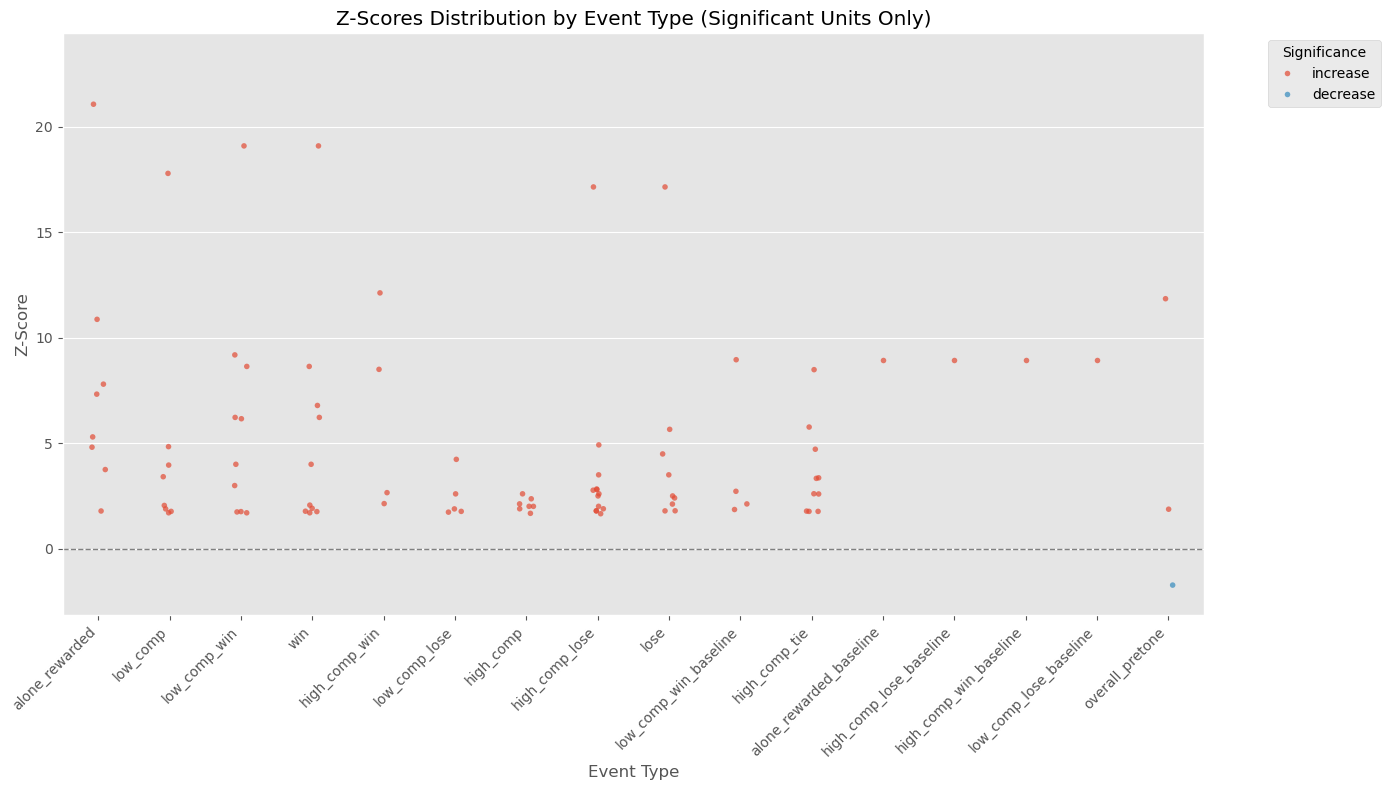

In [43]:
swarm_df = units_df.copy()

# Create swarm plot
import seaborn as sns
plt.figure(figsize=(14, 8))
# Replace swarmplot with stripplot - it handles overlapping points better
sns.stripplot(data=swarm_df, x='Event name', y='Event Z-Score', hue='sig', size=4, jitter=True, alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Z-Scores Distribution by Event Type (Significant Units Only)')
plt.xlabel('Event Type')
plt.ylabel('Z-Score')

# Add horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# Adjust y-axis to show negative values clearly
y_min, y_max = plt.ylim()
plt.ylim(y_min * 1.1, y_max * 1.1)  # Add some padding to show negative values clearly

plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

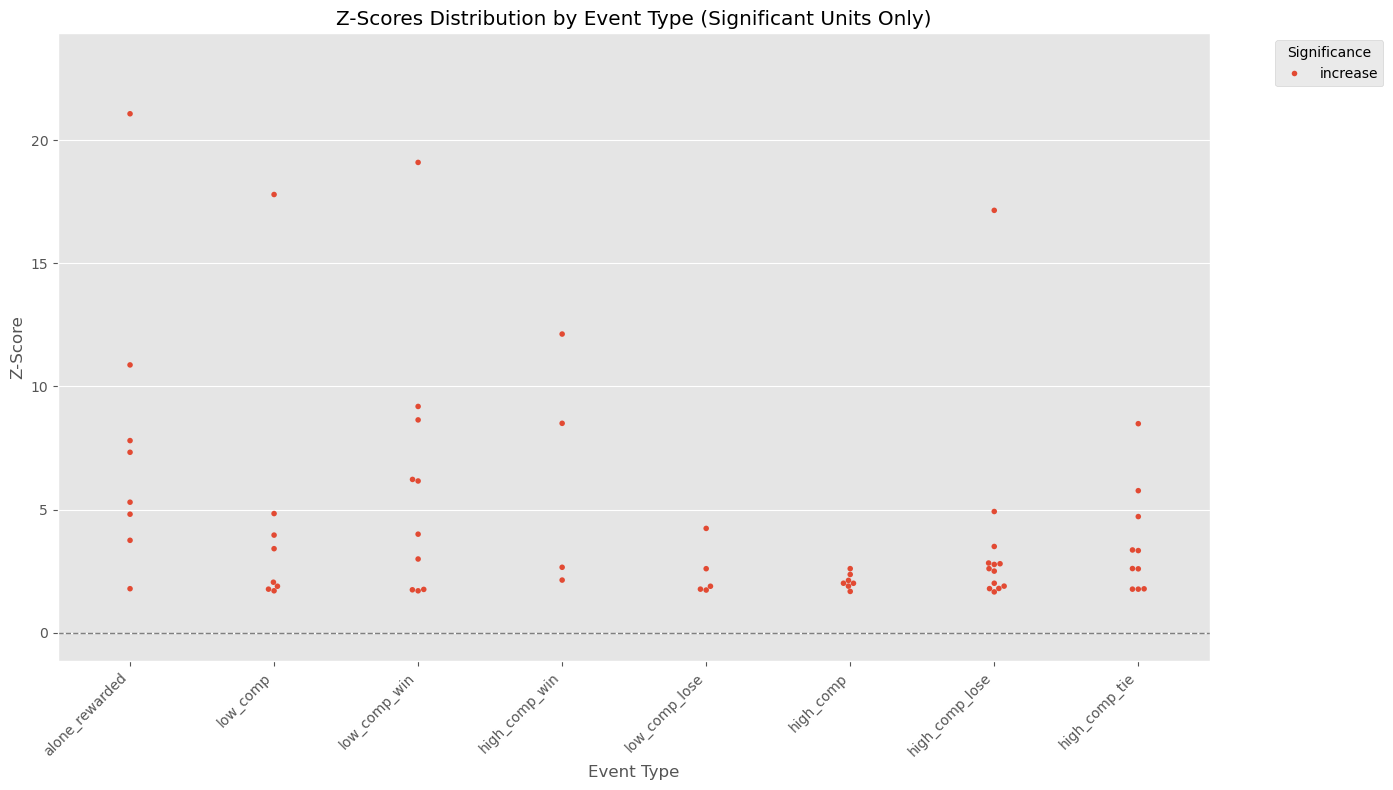

In [44]:
# Filter out baseline events and general win/lose events for swarm plot
events_to_exclude = [
    'alone_rewarded_baseline', 'high_comp_lose_baseline', 'high_comp_win_baseline',
    'low_comp_lose_baseline', 'low_comp_win_baseline', 'overall_pretone', 'win', 'lose'
]

swarm_df = units_df[~units_df['Event name'].isin(events_to_exclude)].copy()

# Create swarm plot
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.swarmplot(data=swarm_df, x='Event name', y='Event Z-Score', hue='sig', size=4)
plt.xticks(rotation=45, ha='right')
plt.title('Z-Scores Distribution by Event Type (Significant Units Only)')
plt.xlabel('Event Type')
plt.ylabel('Z-Score')

# Add horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# Adjust y-axis to show negative values clearly
y_min, y_max = plt.ylim()
plt.ylim(y_min * 1.1, y_max * 1.1)  # Add some padding to show negative values clearly

plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

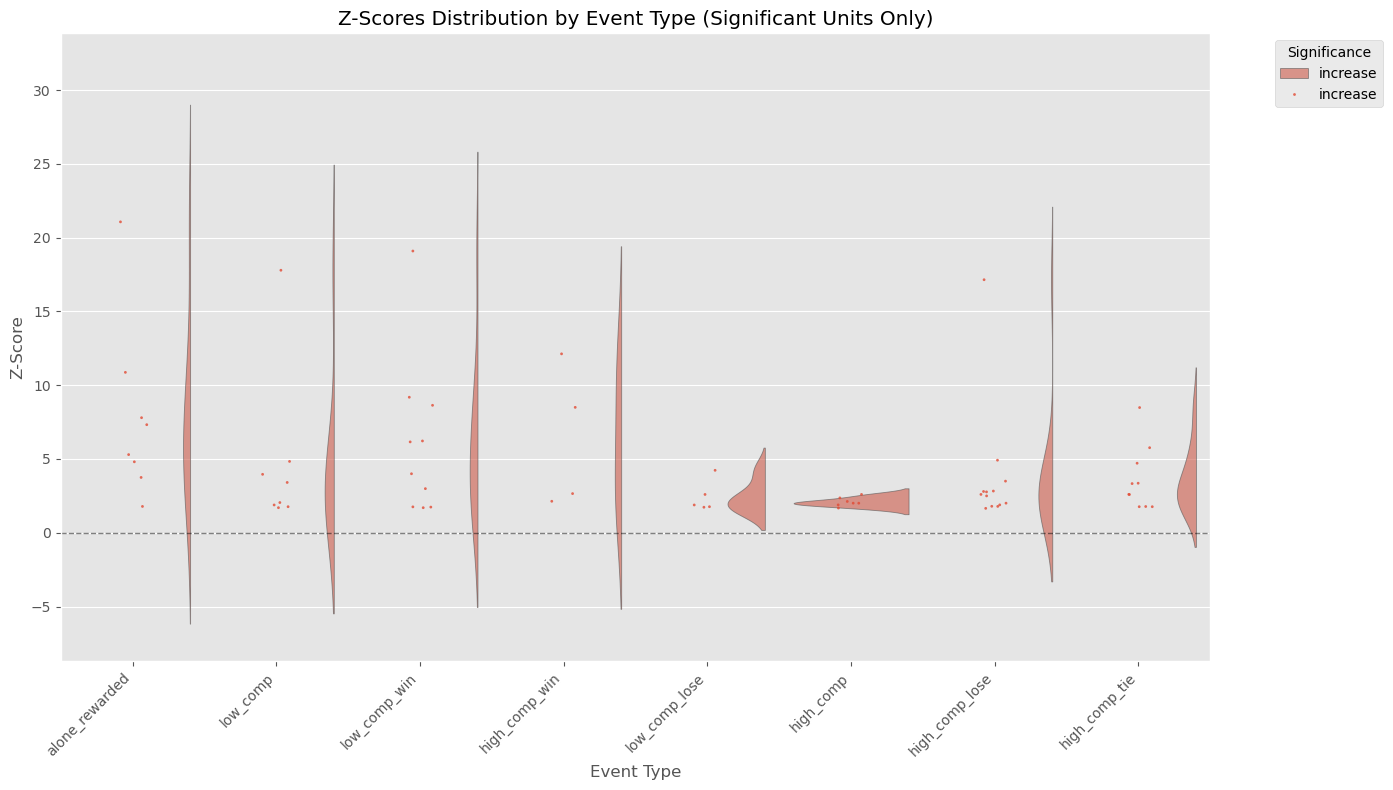

In [45]:
# Filter out baseline events and general win/lose events for swarm plot
events_to_exclude = [
    'alone_rewarded_baseline', 'high_comp_lose_baseline', 'high_comp_win_baseline',
    'low_comp_lose_baseline', 'low_comp_win_baseline', 'overall_pretone', 'win', 'lose'
]

swarm_df = units_df[~units_df['Event name'].isin(events_to_exclude)].copy()

# Create swarm plot
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.violinplot(data=swarm_df, x='Event name', y='Event Z-Score', hue='sig', split=True, inner=None, alpha=0.6)
sns.stripplot(data=swarm_df, x='Event name', y='Event Z-Score', hue='sig', size=2, jitter=True, alpha=0.8, dodge=True)
plt.xticks(rotation=45, ha='right')
plt.title('Z-Scores Distribution by Event Type (Significant Units Only)')
plt.xlabel('Event Type')
plt.ylabel('Z-Score')

# Add horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# Adjust y-axis to show negative values clearly
y_min, y_max = plt.ylim()
plt.ylim(y_min * 1.1, y_max * 1.1)  # Add some padding to show negative values clearly

plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Creating Dataframe with numbers of increasing and decreasing sig per event type

In [46]:
def count_sig_types(df):
    event_types = df['Event name'].unique()
    results = []

    # Iterate through each event type and count significant units
    for event in event_types:
        event_df = df[df['Event name'] == event]
        total_units = len(event_df)
        increasing_units = len(event_df[event_df['sig'] == 'increase'])
        decreasing_units = len(event_df[event_df['sig'] == 'decrease'])
        
        results.append({
            'Event name': event,
            'Total Significant Units': total_units,
            'Increasing Units': increasing_units,
            'Decreasing Units': decreasing_units
        })

    return pd.DataFrame(results)

sig_counts_df = count_sig_types(units_df)
sig_counts_df

,Event name,Total Significant Units,Increasing Units,Decreasing Units
0,alone_rewarded,8,8,0
1,low_comp,8,8,0
2,low_comp_win,10,10,0
3,win,10,10,0
4,high_comp_win,4,4,0
5,low_comp_lose,5,5,0
6,high_comp,7,7,0
7,high_comp_lose,13,13,0
8,lose,9,9,0
9,low_comp_win_baseline,4,4,0


In [47]:
# print % of increasing and decreasing units per event type
sig_counts_df['% Increasing Units'] = (sig_counts_df['Increasing Units'] / sig_counts_df['Total Significant Units']) * 100
sig_counts_df['% Decreasing Units'] = (sig_counts_df['Decreasing Units'] / sig_counts_df['Total Significant Units']) * 100
sig_counts_df

,Event name,Total Significant Units,Increasing Units,Decreasing Units,% Increasing Units,% Decreasing Units
0,alone_rewarded,8,8,0,100.000000,0.000000
1,low_comp,8,8,0,100.000000,0.000000
2,low_comp_win,10,10,0,100.000000,0.000000
3,win,10,10,0,100.000000,0.000000
4,high_comp_win,4,4,0,100.000000,0.000000
5,low_comp_lose,5,5,0,100.000000,0.000000
6,high_comp,7,7,0,100.000000,0.000000
7,high_comp_lose,13,13,0,100.000000,0.000000
8,lose,9,9,0,100.000000,0.000000
9,low_comp_win_baseline,4,4,0,100.000000,0.000000


### Need to do
1. Try to make that scatter plot trying to group types by winning and losing, then high_comp low_comp
2. Investigate code that produced this result again. Try to find out why baselines have all the same # of sig neurons, see if they're the same

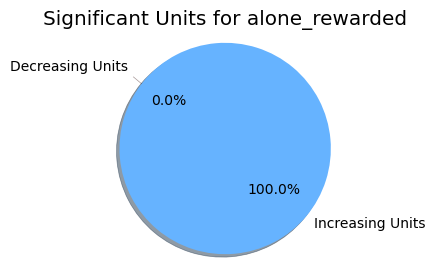

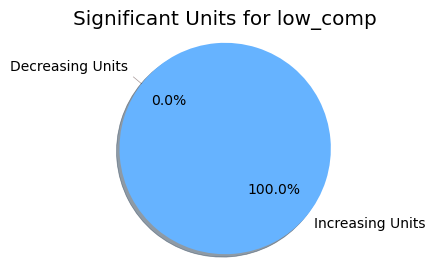

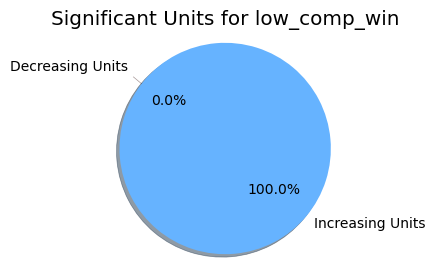

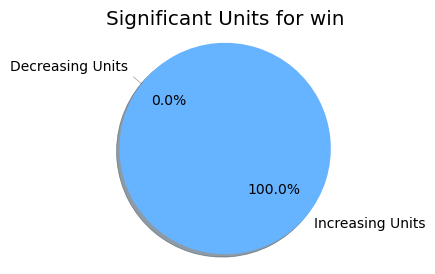

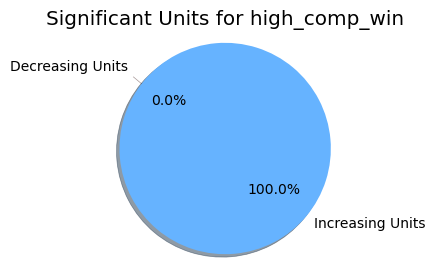

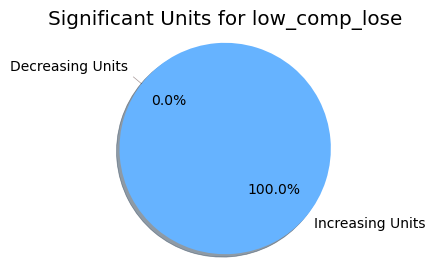

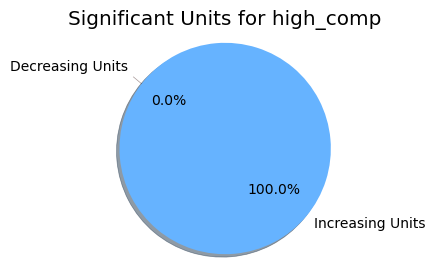

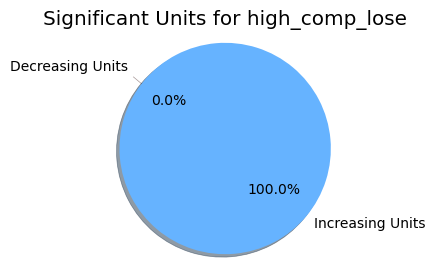

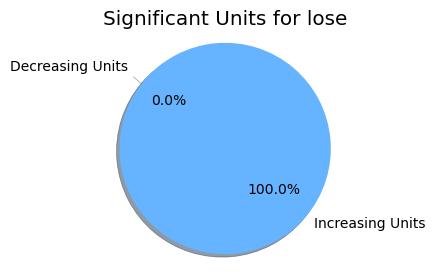

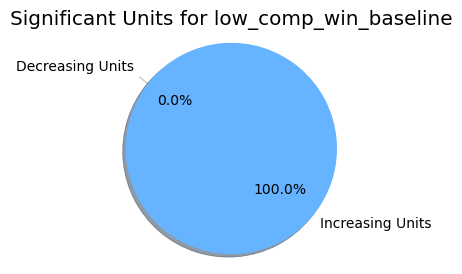

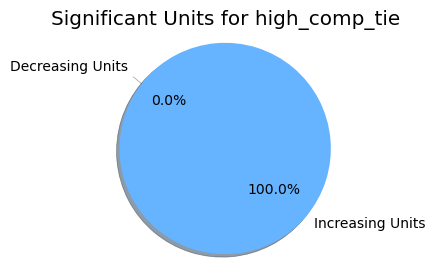

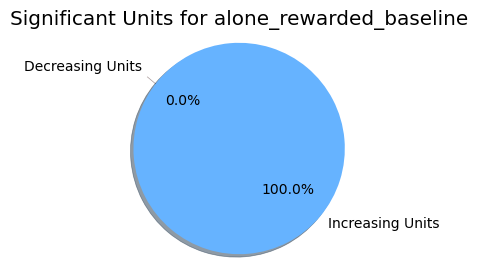

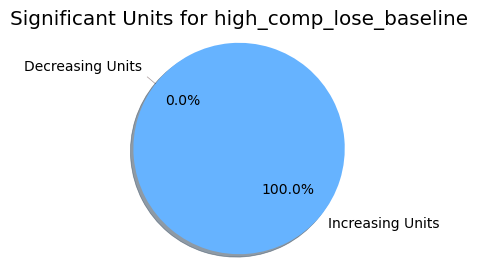

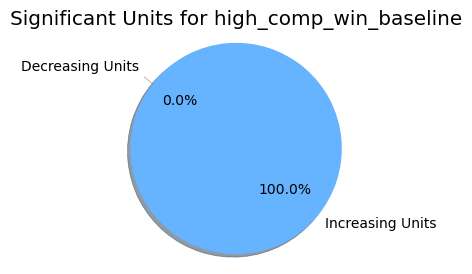

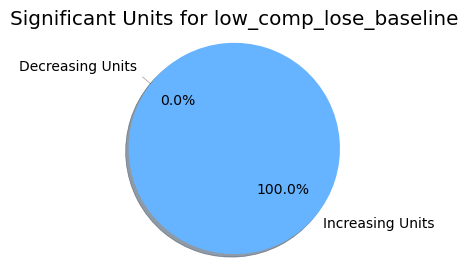

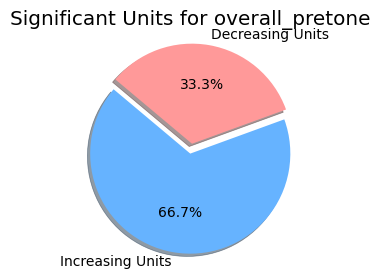

In [48]:
# pie plot of increasing vs decreasing units for each event type
for index, row in sig_counts_df.iterrows():
    labels = ['Increasing Units', 'Decreasing Units']
    sizes = [row['Increasing Units'], row['Decreasing Units']]
    colors = ['#66b3ff', '#ff9999']
    explode = (0.1, 0)  # explode the 1st slice (i.e. 'Increasing Units')

    plt.figure(figsize=(3, 3))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(f'Significant Units for {row["Event name"]}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

### Bar Plots Quantitating the Number of Increasing and Decreasing Units Per Event

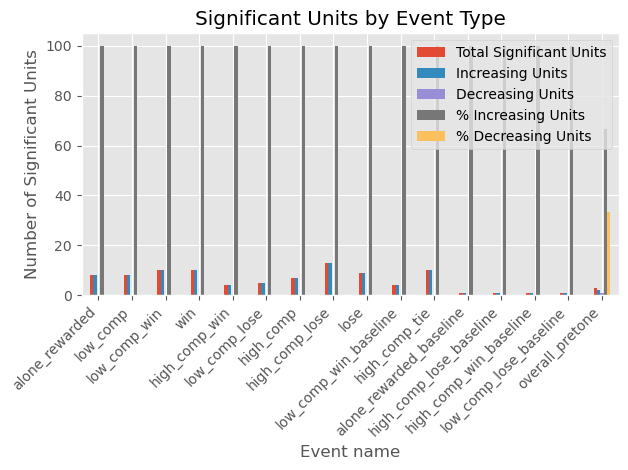

In [49]:
# bar plot of each event type with increasing and decreasing units side by side
sig_counts_df.set_index('Event name').plot(kind='bar', stacked=False)
plt.ylabel('Number of Significant Units')
plt.title('Significant Units by Event Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

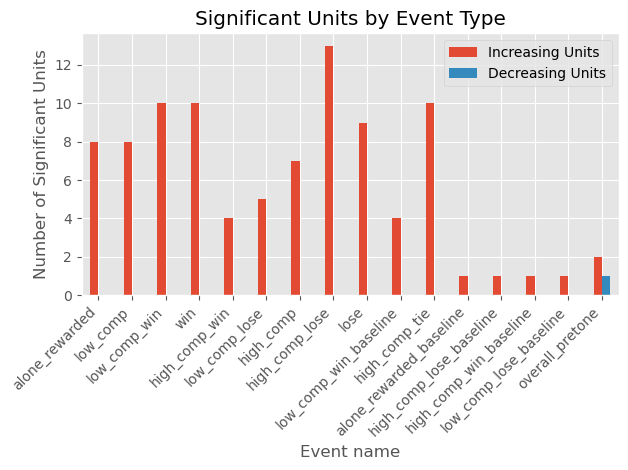

In [50]:
# bar plot of each event type with increasing and decreasing units side by side
sig_counts_df.set_index('Event name')[['Increasing Units', 'Decreasing Units']].plot(kind='bar', stacked=False)
plt.ylabel('Number of Significant Units')
plt.title('Significant Units by Event Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Dropping Baseline rows

In [51]:
sig_counts_df = sig_counts_df[~sig_counts_df['Event name'].isin([
    'alone_rewarded_baseline', 'high_comp_lose_baseline', 'high_comp_win_baseline',
    'low_comp_lose_baseline', 'low_comp_win_baseline', 'overall_pretone'
])]

In [52]:
sig_counts_df.head()

,Event name,Total Significant Units,Increasing Units,Decreasing Units,% Increasing Units,% Decreasing Units
0,alone_rewarded,8,8,0,100.0,0.0
1,low_comp,8,8,0,100.0,0.0
2,low_comp_win,10,10,0,100.0,0.0
3,win,10,10,0,100.0,0.0
4,high_comp_win,4,4,0,100.0,0.0


#### Plot of each Event types Sig increasing and decreasing # of units

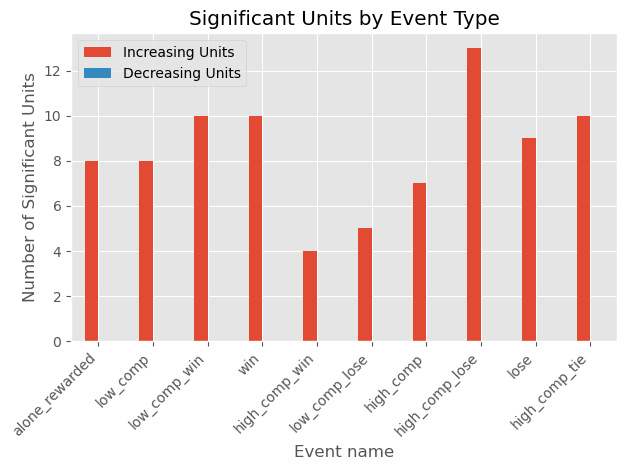

In [53]:
# bar plot of each event type with increasing and decreasing units side by side
sig_counts_df.set_index('Event name')[['Increasing Units', 'Decreasing Units']].plot(kind='bar', stacked=False)
plt.ylabel('Number of Significant Units')
plt.title('Significant Units by Event Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Plot of both increasing and decreasing units, from least to most decreasing units

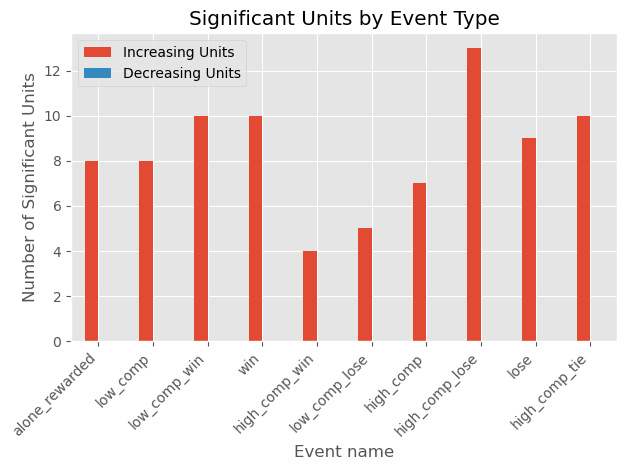

In [54]:
# bar plot of each event type with increasing and decreasing units side by side
# Sort by decreasing units (ascending order - lowest to highest from left to right)
sorted_df = sig_counts_df.sort_values('Decreasing Units')
sorted_df.set_index('Event name')[['Increasing Units', 'Decreasing Units']].plot(kind='bar', stacked=False)
plt.ylabel('Number of Significant Units')
plt.title('Significant Units by Event Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Plot of Decreasing Units per Event

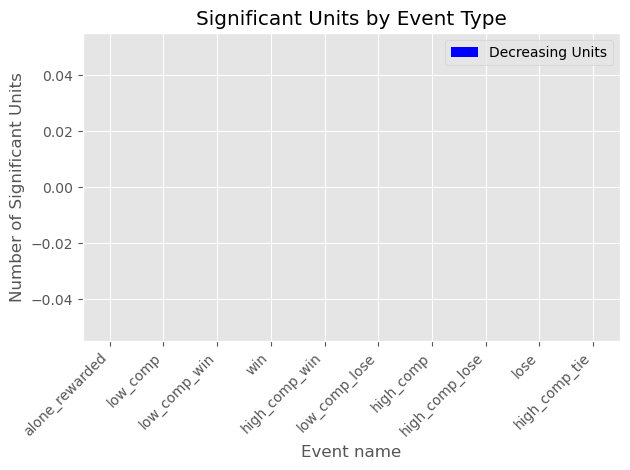

In [55]:
# bar plot of each event type with increasing and decreasing units side by side
# Sort by decreasing units (ascending order - lowest to highest from left to right)
sorted_df = sig_counts_df.sort_values('Decreasing Units')
sorted_df.set_index('Event name')[['Decreasing Units']].plot(kind='bar', stacked=False, color='blue')
plt.ylabel('Number of Significant Units')
plt.title('Significant Units by Event Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Pie Plot of Decreasing Units per Event

## Change this plot to show groupings once fix is done | low comp vs high comp | win vs lose

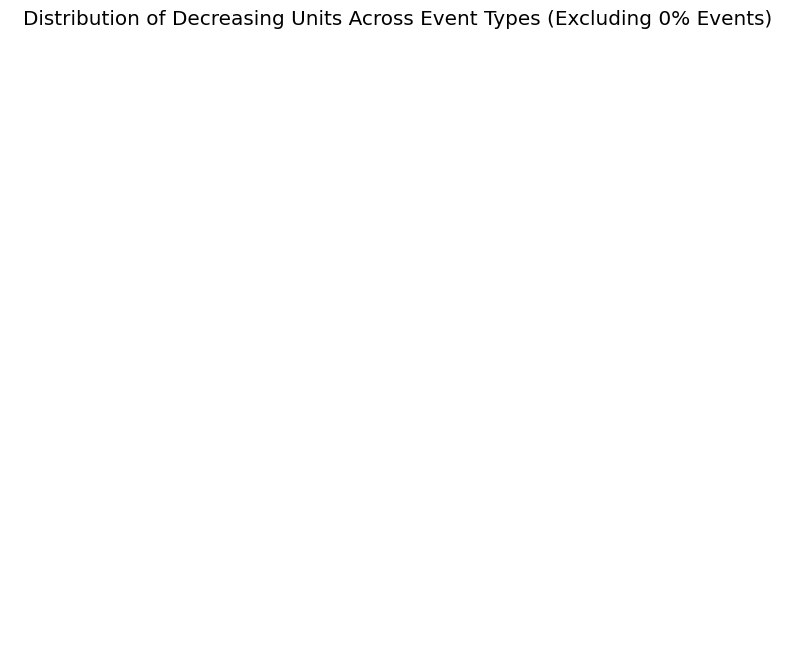

In [56]:
# pie plot of decreasing units per event type (excluding 0% events)
filtered_df = sorted_df[sorted_df['Decreasing Units'] > 0]
labels = filtered_df['Event name'].tolist()
sizes = filtered_df['Decreasing Units'].tolist()
colors = plt.cm.Set3(range(len(labels)))

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Decreasing Units Across Event Types (Excluding 0% Events)')
plt.axis('equal')
plt.show()

#### Plot of Increasing Units per event

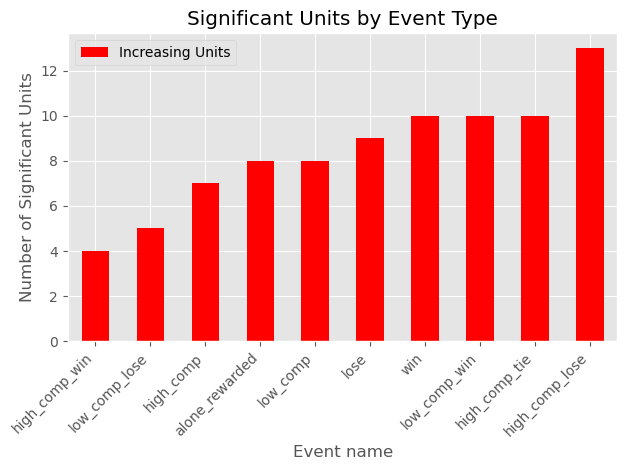

In [57]:
# bar plot of each event type with increasing and decreasing units side by side
# Sort by decreasing units (ascending order - lowest to highest from left to right)
sorted_df = sig_counts_df.sort_values('Increasing Units')
sorted_df.set_index('Event name')[['Increasing Units']].plot(kind='bar', stacked=False, color='red')
plt.ylabel('Number of Significant Units')
plt.title('Significant Units by Event Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [58]:
print(f"{int(sig_counts_df['Total Significant Units'].sum())}")

84


### Grouped Pie Plots by Event Categories
#### Decreasing Units by Win Events

In [ ]:
'''
# Group win events and create pie plot for decreasing units
win_events = ['high_comp_win', 'low_comp_win', 'win']
win_df = sig_counts_df[sig_counts_df['Event name'].isin(win_events)]

labels = win_df['Event name'].tolist()
sizes = win_df['Decreasing Units'].tolist()
colors = ['#ff9999', '#ffcc99', '#ff6666']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Decreasing Units - Win Events')
plt.axis('equal')
plt.show()
'''

c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\matplotlib\axes\_axes.py:3365: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 800x600 with 1 Axes>

#### Decreasing Units by Lose Events

In [60]:
# Group lose events and create pie plot for decreasing units
lose_events = ['high_comp_lose', 'low_comp_lose', 'lose']
lose_df = sig_counts_df[sig_counts_df['Event name'].isin(lose_events)]

labels = lose_df['Event name'].tolist()
sizes = lose_df['Decreasing Units'].tolist()
colors = ['#99ccff', '#cce6ff', '#6699ff']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Decreasing Units - Lose Events')
plt.axis('equal')
plt.show()

c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\matplotlib\axes\_axes.py:3365: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 800x600 with 1 Axes>

#### Increasing Units by Win Events

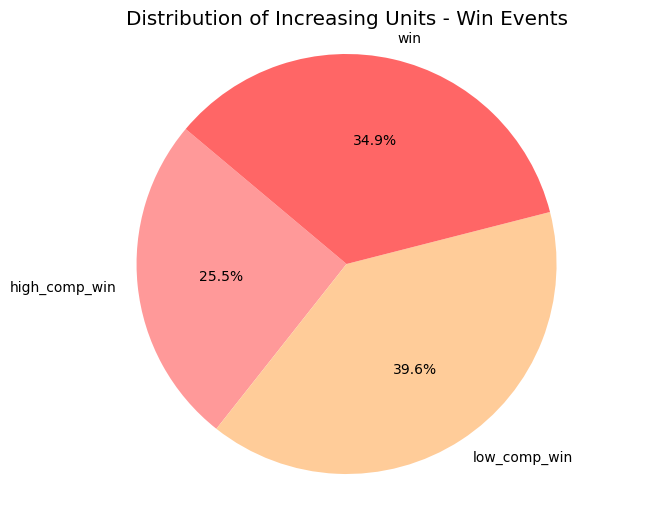

In [ ]:
# Group win events and create pie plot for increasing units
win_events = ['high_comp_win', 'low_comp_win', 'win']
win_df = sig_counts_df[sig_counts_df['Event name'].isin(win_events)]

labels = win_df['Event name'].tolist()
sizes = win_df['Increasing Units'].tolist()
colors = ['#ff9999', '#ffcc99', '#ff6666']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Increasing Units - Win Events')
plt.axis('equal')
plt.show()

#### Increasing Units by Lose Events

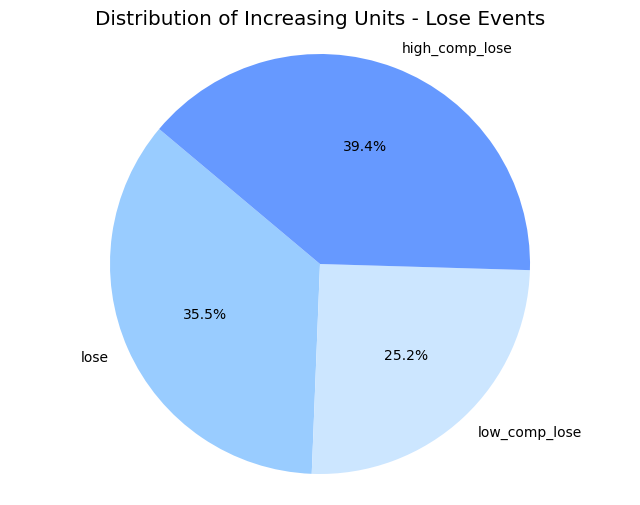

In [ ]:
# Group lose events and create pie plot for increasing units
lose_events = ['high_comp_lose', 'low_comp_lose', 'lose']
lose_df = sig_counts_df[sig_counts_df['Event name'].isin(lose_events)]

labels = lose_df['Event name'].tolist()
sizes = lose_df['Increasing Units'].tolist()
colors = ['#99ccff', '#cce6ff', '#6699ff']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Increasing Units - Lose Events')
plt.axis('equal')
plt.show()